# Data Preparation

In [1]:
# Installing Required Libraries
# !pip install pandas plotly xlrd openpyxl seaborn xgboost scikit-optimize

In [2]:
import pandas as pd
import plotly.express as px

In [3]:
# Data Path

home_index_path = './S&P CoreLogic Case-Shiller U.S. National Home Price Index.xls'
gdp_path = 'GDP.xls'
inflation_path = './inflation.xlsx'
unrate_path = './unemployment.xls'
population_path = './population growth.xls'

## Home Price Index
* Source -: fred.stlouisfed.org/series/CSUSHPISA

In [4]:
# Load the data from the Excel file
home_index = pd.read_excel(home_index_path)

home_index

,observation_date,CSUSHPISA
0,1987-01-01,63.965
1,1987-02-01,64.423
2,1987-03-01,64.735
3,1987-04-01,65.131
4,1987-05-01,65.563
...,...,...
443,2023-12-01,314.443
444,2024-01-01,315.728
445,2024-02-01,317.257
446,2024-03-01,318.217


In [5]:
# Rename Column
home_index.rename(columns={'observation_date':'Date','CSUSHPISA':'Home Price Index'},inplace=True)

In [6]:
home_index

,Date,Home Price Index
0,1987-01-01,63.965
1,1987-02-01,64.423
2,1987-03-01,64.735
3,1987-04-01,65.131
4,1987-05-01,65.563
...,...,...
443,2023-12-01,314.443
444,2024-01-01,315.728
445,2024-02-01,317.257
446,2024-03-01,318.217


In [ ]:
fig = px.line(home_index, x='Date', y='Home Price Index', 
              title='Home Price Index Over Time',
              labels={'Date': 'Date', 'Home Price Index': 'Home Price Index'})
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Home Price Index')
fig.update_layout(title_text='Home Price Index Over Time', title_x=0.5)
fig.show()

## GDP
* Source -: https://fred.stlouisfed.org/series/GDP

In [8]:
# Load the data from the Excel file
gdp = pd.read_excel(gdp_path)

gdp

,observation_date,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742
...,...,...
304,2023-01-01,26813.601
305,2023-04-01,27063.012
306,2023-07-01,27610.128
307,2023-10-01,27956.998


In [9]:
# Convert the observation_date column to datetime
gdp['observation_date'] = pd.to_datetime(gdp['observation_date'])

# Set the observation_date as the index
gdp.set_index('observation_date', inplace=True)

# Generate a date range with the 1st of each month
date_range = pd.date_range(start=gdp.index.min(), end=gdp.index.max(), freq='MS')

# Reindex the DataFrame to the new date range and forward fill missing values
monthly_gdp = gdp.reindex(date_range).ffill()

# Reset the index to make observation_date a column again
monthly_gdp.reset_index(inplace=True)
monthly_gdp.rename(columns={'index': 'observation_date'}, inplace=True)

# Rename GDP column
monthly_gdp.rename(columns={'observation_date':'Date','GDP':'GDP(in Billions)'},inplace=True)

In [10]:
monthly_gdp

,Date,GDP(in Billions)
0,1947-01-01,243.164
1,1947-02-01,243.164
2,1947-03-01,243.164
3,1947-04-01,245.968
4,1947-05-01,245.968
...,...,...
920,2023-09-01,27610.128
921,2023-10-01,27956.998
922,2023-11-01,27956.998
923,2023-12-01,27956.998


In [11]:
fig = px.line(monthly_gdp, x='Date', y='GDP(in Billions)', 
              title='GDP Over Time',
              labels={'Date': 'Date', 'GDP(in Billions)': 'GDP(in Billions)'})
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='GDP(in Billions)')
fig.update_layout(title_text='GDP(in Billions) Over Time', title_x=0.5)
fig.show()

## Inflation Rate
* Source -: https://www.usinflationcalculator.com/inflation/current-inflation-rates/

In [12]:
# Load the data from the Excel file
inflation = pd.read_excel(inflation_path)

inflation

,Date,Inflation Rate
0,1987-01-01,1.5
1,1987-02-01,2.1
2,1987-03-01,3.0
3,1987-04-01,3.8
4,1987-05-01,3.9
...,...,...
445,2024-02-01,3.2
446,2024-03-01,3.5
447,2024-04-01,3.4
448,2024-05-01,3.3


In [13]:
fig = px.line(inflation, x='Date', y='Inflation Rate', 
              title='Inflation Rate Over Time',
              labels={'Date': 'Date', 'Inflation Rate': 'Inflation Rate'})
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Inflation Rate')
fig.update_layout(title_text='Inflation Rate Over Time', title_x=0.5)
fig.show()

## Unemployment Rate
* Source -: https://fred.stlouisfed.org/series/UNRATE

In [14]:
# Load the data from the Excel file
unrate = pd.read_excel(unrate_path)

unrate

,observation_date,UNEMPLOYMENT RATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
913,2024-02-01,3.9
914,2024-03-01,3.8
915,2024-04-01,3.9
916,2024-05-01,4.0


In [15]:
# Rename Observation_date & UNEMPLOYMENT RATE column
unrate.rename(columns={'observation_date':'Date','UNEMPLOYMENT RATE':'Unemployment Rate'},inplace=True)

unrate

,Date,Unemployment Rate
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
913,2024-02-01,3.9
914,2024-03-01,3.8
915,2024-04-01,3.9
916,2024-05-01,4.0


In [16]:
fig = px.line(unrate, x='Date', y='Unemployment Rate', 
              title='Unemployment Rate Over Time',
              labels={'Date': 'Date', 'Unemployment Rate': 'Unemployment Rate'})
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Unemployment Rate')
fig.update_layout(title_text='Unemployment Rate Over Time', title_x=0.5)
fig.show()

## Population Growth
* Source -: https://data.worldbank.org/indicator/SP.POP.GROW?locations=US

In [17]:
# Load the data from the Excel file
population = pd.read_excel(population_path)

population

,observation_date,SPPOPGROWUSA
0,1961-01-01,1.657730
1,1962-01-01,1.537997
2,1963-01-01,1.439165
3,1964-01-01,1.389046
4,1965-01-01,1.250172
...,...,...
58,2019-01-01,0.455381
59,2020-01-01,0.969000
60,2021-01-01,0.157343
61,2022-01-01,0.367473


In [18]:
# Convert the observation_date column to datetime
population['observation_date'] = pd.to_datetime(population['observation_date'])

# Set the observation_date as the index
population.set_index('observation_date', inplace=True)

# Generate a date range with the 1st of each month
date_range = pd.date_range(start=population.index.min(), end=population.index.max(), freq='MS')

# Reindex the DataFrame to the new date range and forward fill missing values
monthly_population = population.reindex(date_range).ffill()

# Reset the index to make observation_date a column again
monthly_population.reset_index(inplace=True)
monthly_population.rename(columns={'index': 'observation_date'}, inplace=True)

# Rename Observation_date & SPPOPGROWUSA column
monthly_population.rename(columns={'observation_date':'Date','SPPOPGROWUSA':'Population Growth'},inplace=True)

In [19]:
monthly_population

,Date,Population Growth
0,1961-01-01,1.657730
1,1961-02-01,1.657730
2,1961-03-01,1.657730
3,1961-04-01,1.657730
4,1961-05-01,1.657730
...,...,...
740,2022-09-01,0.367473
741,2022-10-01,0.367473
742,2022-11-01,0.367473
743,2022-12-01,0.367473


In [20]:
fig = px.line(monthly_population, x='Date', y='Population Growth', 
              title='Population Growth Over Time',
              labels={'Date': 'Date', 'Population Growth': 'Population Growth'})
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Population Growth')
fig.update_layout(title_text='Population Growth Over Time', title_x=0.5)
fig.show()

## Combining Data

In [21]:
# Convert the Date columns to datetime
home_index['Date'] = pd.to_datetime(home_index['Date'])
monthly_gdp['Date'] = pd.to_datetime(monthly_gdp['Date'])
inflation['Date'] = pd.to_datetime(inflation['Date'])
unrate['Date'] = pd.to_datetime(unrate['Date'])
monthly_population['Date'] = pd.to_datetime(monthly_population['Date'])

In [22]:
# Set the Date columns as the index
home_index.set_index('Date', inplace=True)
monthly_gdp.set_index('Date', inplace=True)
inflation.set_index('Date', inplace=True)
unrate.set_index('Date', inplace=True)
monthly_population.set_index('Date', inplace=True)

# Merge the datasets on the 'Date' column using the home_index as the reference
combined_data = home_index\
    .join(monthly_gdp, how='left')\
    .join(inflation, how='left')\
    .join(unrate, how='left')\
    .join(monthly_population, how='left')

# Reset the index to make Date a column again
combined_data.reset_index(inplace=True)

In [23]:
combined_data

,Date,Home Price Index,GDP(in Billions),Inflation Rate,Unemployment Rate,Population Growth
0,1987-01-01,63.965,4722.156,1.5,6.6,0.893829
1,1987-02-01,64.423,4722.156,2.1,6.6,0.893829
2,1987-03-01,64.735,4722.156,3.0,6.6,0.893829
3,1987-04-01,65.131,4806.160,3.8,6.3,0.893829
4,1987-05-01,65.563,4806.160,3.9,6.3,0.893829
...,...,...,...,...,...,...
443,2023-12-01,314.443,27956.998,3.4,3.7,NaN
444,2024-01-01,315.728,28269.174,3.1,3.7,NaN
445,2024-02-01,317.257,NaN,3.2,3.9,NaN
446,2024-03-01,318.217,NaN,3.5,3.8,NaN


In [24]:
# Fill missing values with the median of each column
combined_data = combined_data.fillna(combined_data.median())

# Reset the index to make Date a column again
combined_data.reset_index(inplace=True)

In [25]:
combined_data

,index,Date,Home Price Index,GDP(in Billions),Inflation Rate,Unemployment Rate,Population Growth
0,0,1987-01-01,63.965,4722.156,1.5,6.6,0.893829
1,1,1987-02-01,64.423,4722.156,2.1,6.6,0.893829
2,2,1987-03-01,64.735,4722.156,3.0,6.6,0.893829
3,3,1987-04-01,65.131,4806.160,3.8,6.3,0.893829
4,4,1987-05-01,65.563,4806.160,3.9,6.3,0.893829
...,...,...,...,...,...,...,...
443,443,2023-12-01,314.443,27956.998,3.4,3.7,0.925484
444,444,2024-01-01,315.728,28269.174,3.1,3.7,0.925484
445,445,2024-02-01,317.257,13142.642,3.2,3.9,0.925484
446,446,2024-03-01,318.217,13142.642,3.5,3.8,0.925484


In [26]:
# Saving the combined data in csv format
combined_data.to_csv('combined_data.csv')

# Exploratory Data Analysis (EDA)

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Load data
data = pd.read_csv('combined_data.csv')  

# Display first few rows of the dataset
data.head()

,Unnamed: 0,index,Date,Home Price Index,GDP(in Billions),Inflation Rate,Unemployment Rate,Population Growth
0,0,0,1987-01-01,63.965,4722.156,1.5,6.6,0.893829
1,1,1,1987-02-01,64.423,4722.156,2.1,6.6,0.893829
2,2,2,1987-03-01,64.735,4722.156,3.0,6.6,0.893829
3,3,3,1987-04-01,65.131,4806.160,3.8,6.3,0.893829
4,4,4,1987-05-01,65.563,4806.160,3.9,6.3,0.893829


In [29]:
# Delete 'Unnamed:0' column
data = data.drop('Unnamed: 0', axis=1)

data

,index,Date,Home Price Index,GDP(in Billions),Inflation Rate,Unemployment Rate,Population Growth
0,0,1987-01-01,63.965,4722.156,1.5,6.6,0.893829
1,1,1987-02-01,64.423,4722.156,2.1,6.6,0.893829
2,2,1987-03-01,64.735,4722.156,3.0,6.6,0.893829
3,3,1987-04-01,65.131,4806.160,3.8,6.3,0.893829
4,4,1987-05-01,65.563,4806.160,3.9,6.3,0.893829
...,...,...,...,...,...,...,...
443,443,2023-12-01,314.443,27956.998,3.4,3.7,0.925484
444,444,2024-01-01,315.728,28269.174,3.1,3.7,0.925484
445,445,2024-02-01,317.257,13142.642,3.2,3.9,0.925484
446,446,2024-03-01,318.217,13142.642,3.5,3.8,0.925484


### Summary Statistics
* Get summary statistics to understand the distribution of the data.

In [30]:
data.describe()

,index,Home Price Index,GDP(in Billions),Inflation Rate,Unemployment Rate,Population Growth
count,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000
mean,223.500000,144.621897,13432.031243,2.820759,5.736161,0.910025
std,129.470717,64.425989,6081.146470,1.636850,1.684881,0.267187
min,0.000000,63.965000,4722.156000,-2.100000,3.400000,0.157343
25%,111.750000,82.562500,8032.840000,1.700000,4.500000,0.733600
50%,223.500000,141.861500,13142.642000,2.700000,5.400000,0.925484
75%,335.250000,180.401500,17831.190750,3.525000,6.600000,1.129651
max,447.000000,319.048000,28269.174000,9.100000,14.800000,1.386886


### Correlation Matrix
* Calculate the correlation matrix to identify relationships between variables.

                   Home Price Index  GDP(in Billions)  Inflation Rate  \
Home Price Index           1.000000          0.938873        0.118653   
GDP(in Billions)           0.938873          1.000000       -0.033176   
Inflation Rate             0.118653         -0.033176        1.000000   
Unemployment Rate         -0.261355         -0.167296       -0.331800   
Population Growth         -0.711354         -0.770040       -0.073700   

                   Unemployment Rate  Population Growth  
Home Price Index           -0.261355          -0.711354  
GDP(in Billions)           -0.167296          -0.770040  
Inflation Rate             -0.331800          -0.073700  
Unemployment Rate           1.000000           0.135945  
Population Growth           0.135945           1.000000  


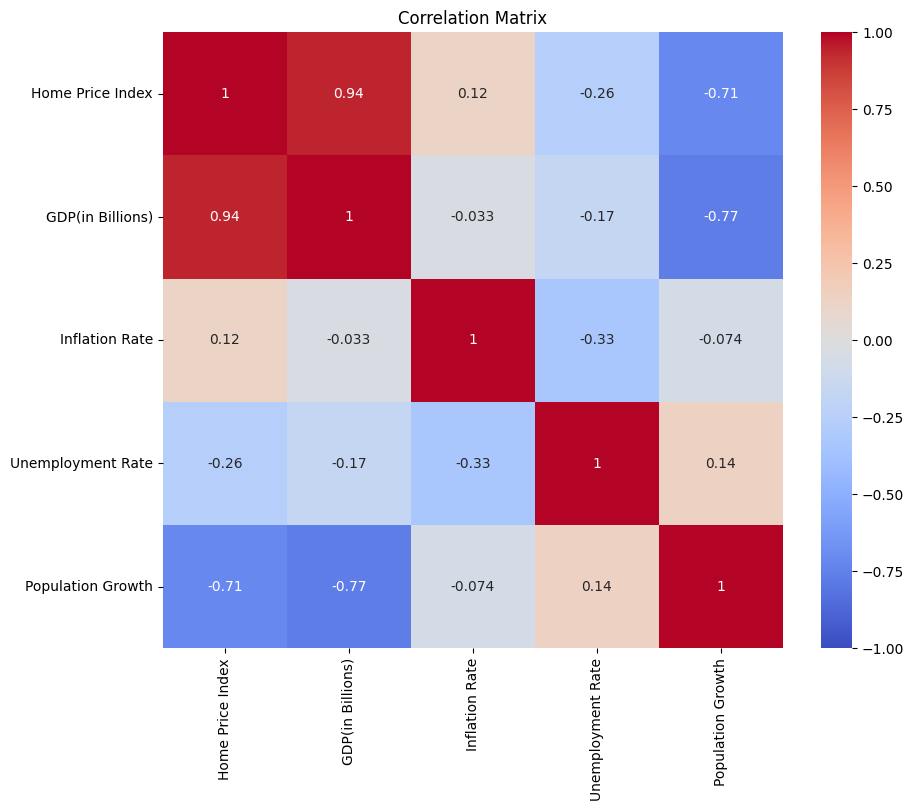

In [31]:
# Drop non-numeric columns
numeric_data = data.drop(columns=['index', 'Date'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Print the correlation matrix to verify values
print(correlation_matrix)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


### Time Series Plot
- Plot the time series for each variable to identify trends over time.
- Given the large difference in scales between the Home Price Index and the other metrics, it makes sense to normalize or standardize the data before plotting. This way, we can compare trends more effectively.
- **Normalize or Standardize Data**: You can scale the data to bring all metrics into a similar range. Standardization (subtracting the mean and dividing by the standard deviation) is a common method.
- **Standardizing Data**: Using StandardScaler from sklearn.preprocessing to standardize the data so that it has a mean of 0 and a standard deviation of 1.

In [32]:
import plotly.express as px
from sklearn.preprocessing import StandardScaler

# Normalize or Standardize the data
scaler = StandardScaler()
data_standardized = data.copy()
data_standardized[['Home Price Index', 'GDP(in Billions)', 'Inflation Rate', 'Unemployment Rate', 'Population Growth']] = scaler.fit_transform(
    data[['Home Price Index', 'GDP(in Billions)', 'Inflation Rate', 'Unemployment Rate', 'Population Growth']])

# Melt the standardized data
data_melted = data_standardized.melt(id_vars=['Date'], value_vars=['Home Price Index', 'GDP(in Billions)', 'Inflation Rate', 'Unemployment Rate', 'Population Growth'],
                                     var_name='Metric', value_name='Standardized Value')

# Create the line plot with Plotly
fig = px.line(data_melted, x='Date', y='Standardized Value', color='Metric',
              labels={'Standardized Value': 'Standardized Values', 'Date': 'Date'},
              title='Trends Over Time (Standardized)')

# Show the plot
fig.show()


# Build a Data Science Model
- We'll start by splitting the data into training and testing sets, then build and evaluate the model.

In [33]:
from sklearn.model_selection import train_test_split

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Feature matrix and target variable
X = data[['GDP(in Billions)', 'Inflation Rate', 'Unemployment Rate', 'Population Growth']]
y = data['Home Price Index']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### A simple Linear Regression Model

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 492.32755246887393
R-squared: 0.9102125326222945


In [35]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)


             Feature  Coefficient
0   GDP(in Billions)     0.010332
1     Inflation Rate     5.440256
2  Unemployment Rate    -1.614940
3  Population Growth    12.516485


## Advanced Technique

**Feature Selection**
- Use feature selection methods to identify the most important features.

In [36]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

# Use Random Forest for feature selection
selector = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42))
selector.fit(X_train, y_train)

# Get selected features
selected_features = X.columns[(selector.get_support())]
print(f'Selected Features: {selected_features}')

# Transform the dataset to include only selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

Selected Features: Index(['GDP(in Billions)'], dtype='object')


**Advanced Model**
- Trying XGBoost

In [37]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': np.linspace(0.001, 0.1, num=10),
    'max_depth': [3, 6, 9, 12],
    'subsample': [0.7, 0.8, 0.9]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train_selected, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f'Best Parameters: {best_params}')

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100, 'subsample': 0.7}


**Evaluate the Best Model**
- Evaluate the performance of the best model on the test set.

In [38]:
# Train the best model
best_model.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test_selected)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 87.8330466316625
R-squared: 0.9839815854920623


**Ensemble Methods**
- Combine predictions from multiple models to improve performance.

In [39]:
from sklearn.ensemble import VotingRegressor, RandomForestRegressor
import xgboost
from xgboost import XGBRegressor

# Initialize individual models
rf = RandomForestRegressor(n_estimators=200, random_state=42)
xgb = XGBRegressor(objective='reg:squarederror', n_estimators=200, learning_rate=0.1, max_depth=6, subsample=0.8, random_state=42)

# Combine models using VotingRegressor
ensemble = VotingRegressor(estimators=[('rf', rf), ('xgb', xgb)])

# Train the ensemble model
ensemble.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = ensemble.predict(X_test_selected)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 80.37429151810912
R-squared: 0.9853418642903503


### Advanced Hyperparameter Tuning
- Use Bayesian Optimization for hyperparameter tuning.

In [40]:
from xgboost import XGBRegressor
from skopt import BayesSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Define the parameter search space
param_space = {
    'n_estimators': (100, 500),
    'learning_rate': (0.01, 0.3, 'log-uniform'),
    'max_depth': (3, 10),
    'subsample': (0.6, 1.0),
    'colsample_bytree': (0.6, 1.0)
}

# Initialize Bayesian optimization
bayes_search = BayesSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', random_state=42),
    search_spaces=param_space,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit the model
bayes_search.fit(X_train_selected, y_train)

# Get the best parameters and model
best_params = bayes_search.best_params_
best_model = bayes_search.best_estimator_

print(f'Best Parameters: {best_params}')

# Train the best model
best_model.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test_selected)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Display feature importances
feature_importances = best_model.feature_importances_
selected_feature_names = X.columns[(selector.get_support())]

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': selected_feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi